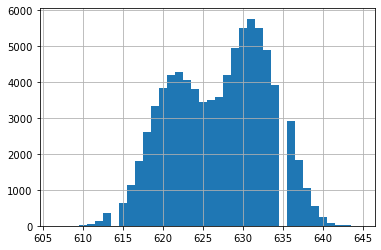

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_600.txt",delimiter = " ",header = None,names = ("data","time","ir","lidar"))
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]),align = 'left')
plt.show()

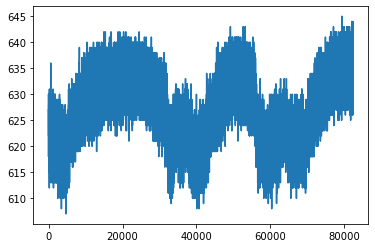

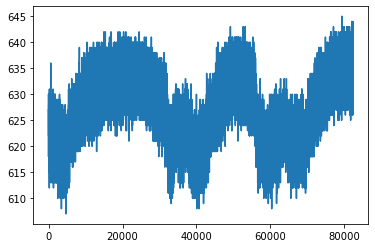

In [10]:
#これでもアクセスできるんですね。
data.lidar.plot()
plt.show()
data["lidar"].plot()
plt.show()

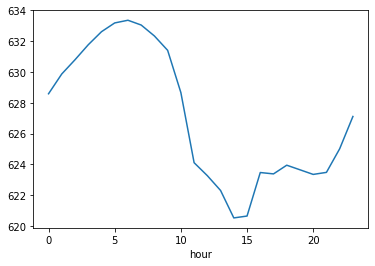

In [11]:
#print(data.time)
data["hour"] = [e//10000 for e in data.time] #//は小数点を切り捨てる割り算で時間だけを残すということらしい

d =data.groupby("hour") #groupbyは同じ値を持つデータをまとめてそれぞれの塊に対して共通の操作を行う場合に使用する
d.lidar.mean().plot()
plt.show()

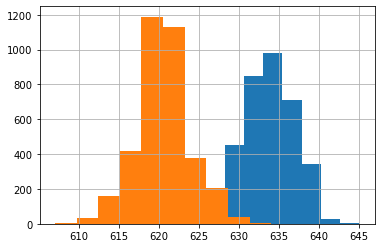

In [12]:
#テクニカルなコードな気がするね。
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()
plt.show()

In [13]:
#each_hourは辞書型の変数で時間帯を辞書のキーにして時間ごとの頻度のデータフレームが、24個入ります
##d.lidar.get_group...は時間iにおけるセンサ値の個数を数え、センサ値順に並べてデータフレームを返します。
##→多分データフレームを理解しないままここまで来ているので、後ほど確認したい。データフレームと辞書型の変数
each_hour = {i:d.lidar.get_group(i).value_counts().sort_index(ascending = False) for i in range(24)} #時間ごとのデータフレームを作成
#24個のデータフレームを一個に連結してじかん、センサ値ごとの頻度表を作成し、さらにそこから同時確立の確率の表を作る
freqs = pd.concat(each_hour,axis = 1)
#print(freqs)
freqs = freqs.fillna(0)
probs = freqs/len(data)

#probs.sort_index()
probs
#freqs
#each_hour

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
642,0.000012,0.000012,0.000012,0.000036,0.000061,0.000024,0.000122,0.000085,0.000024,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012
641,0.000012,0.000012,0.000024,0.000085,0.000109,0.000255,0.000194,0.000194,0.000073,0.000024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
640,0.000012,0.000061,0.000097,0.000255,0.000340,0.000535,0.000595,0.000571,0.000352,0.000061,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000012,0.000036,0.000036
639,0.000134,0.000158,0.000170,0.000790,0.000693,0.001191,0.001288,0.001069,0.000522,0.000279,...,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000036,0.000024,0.000097,0.000158
638,0.000365,0.000304,0.000510,0.000972,0.001689,0.001944,0.002272,0.001956,0.001409,0.000486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000061,0.000122,0.000049,0.000194,0.000134
637,0.000693,0.000863,0.001106,0.001883,0.002527,0.003390,0.003524,0.003098,0.002126,0.000923,...,0.000000,0.000000,0.000000,0.000000,0.000024,0.000085,0.000170,0.000292,0.000340,0.000522
636,0.000863,0.001470,0.002090,0.003062,0.004289,0.004885,0.005115,0.004338,0.003426,0.001725,...,0.000000,0.000000,0.000000,0.000024,0.000061,0.000255,0.000437,0.000535,0.000693,0.000729
634,0.001555,0.002491,0.003390,0.004301,0.004702,0.005626,0.005893,0.005614,0.004374,0.002661,...,0.000012,0.000000,0.000000,0.000073,0.000207,0.000437,0.000875,0.000838,0.001154,0.001495
633,0.002588,0.003086,0.004484,0.005018,0.006355,0.006245,0.006051,0.006172,0.004994,0.003208,...,0.000000,0.000000,0.000036,0.000182,0.000279,0.000875,0.001373,0.001264,0.001531,0.002163
632,0.003038,0.004508,0.005152,0.005456,0.006124,0.005808,0.005589,0.006209,0.005176,0.004313,...,0.000012,0.000024,0.000073,0.000231,0.000498,0.001324,0.001665,0.001592,0.002005,0.002503


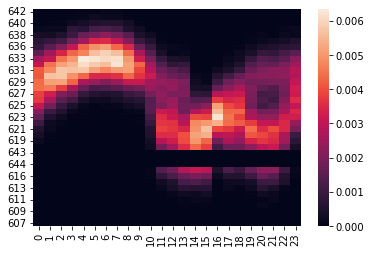

In [14]:
import seaborn as sns

sns.heatmap(probs)
plt.show()

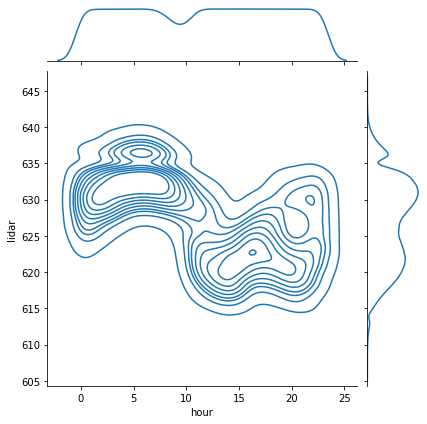

In [15]:
sns.jointplot(x = data["hour"],y = data["lidar"],data = data, kind = "kde")
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.043013,0.042916,0.042879,0.042916,0.042964,0.043037,0.043061,0.043001,0.038712,0.028651,...,0.043183,0.043122,0.043061,0.043122,0.043049,0.043086,0.043159,0.042976,0.043049,0.043037


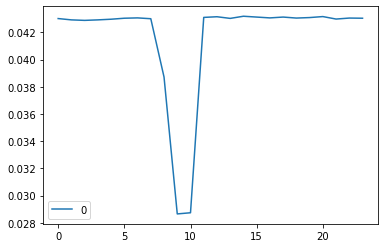

In [16]:
p_t = pd.DataFrame(probs.sum())
p_t.plot()
p_t.transpose()

In [17]:
p_t.sum()

0    1.0
dtype: float64

,642,641,640,639,638,637,636,634,633,632,...,617,616,615,613,612,611,610,609,608,607
0,0.000401,0.000996,0.002989,0.006671,0.012819,0.02226,0.03537,0.047776,0.059623,0.066901,...,0.022053,0.013852,0.007752,0.004241,0.00158,0.00068,0.000328,0.000061,0.000049,0.000012


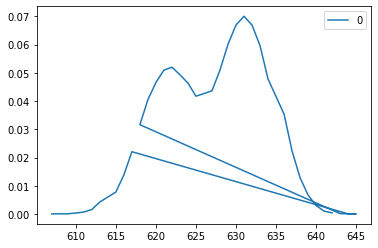

In [18]:
p_z = pd.DataFrame(probs.transpose().sum())
p_z.plot()
p_z.transpose()

In [19]:
cond_z_t = probs/p_t[0]
cond_z_t

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
642,0.000282,0.000283,0.000283,0.000849,0.001414,0.000565,0.002822,0.001978,0.000628,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282
641,0.000282,0.000283,0.000567,0.001982,0.002545,0.005929,0.004515,0.004521,0.001883,0.000848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
640,0.000282,0.001416,0.002267,0.005946,0.007919,0.012422,0.013826,0.013281,0.009102,0.002120,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000000,0.000283,0.000847,0.000847
639,0.003107,0.003681,0.003967,0.018403,0.016120,0.027668,0.029910,0.024866,0.013497,0.009754,...,0.000000,0.000000,0.000000,0.000000,0.000282,0.000282,0.000845,0.000565,0.002258,0.003670
638,0.008475,0.007078,0.011901,0.022650,0.039310,0.045172,0.052765,0.045493,0.036409,0.016964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001410,0.002815,0.001131,0.004516,0.003106
637,0.016102,0.020102,0.025786,0.043884,0.058824,0.078769,0.081828,0.072054,0.054928,0.032231,...,0.000000,0.000000,0.000000,0.000000,0.000564,0.001974,0.003941,0.006785,0.007903,0.012140
636,0.020056,0.034258,0.048739,0.071348,0.099830,0.113495,0.118792,0.100876,0.088512,0.060221,...,0.000000,0.000000,0.000000,0.000564,0.001411,0.005922,0.010135,0.012440,0.016088,0.016940
634,0.036158,0.058041,0.079059,0.100227,0.109446,0.130717,0.136851,0.130545,0.112994,0.092875,...,0.000281,0.000000,0.000000,0.001691,0.004798,0.010152,0.020270,0.019508,0.026813,0.034726
633,0.060169,0.071914,0.104562,0.116931,0.147907,0.145116,0.140519,0.143543,0.129002,0.111959,...,0.000000,0.000000,0.000847,0.004227,0.006492,0.020305,0.031813,0.029403,0.035563,0.050254
632,0.070621,0.105040,0.120147,0.127123,0.142534,0.134952,0.129797,0.144391,0.133710,0.150551,...,0.000281,0.000564,0.001693,0.005354,0.011572,0.030739,0.038570,0.037037,0.046571,0.058159


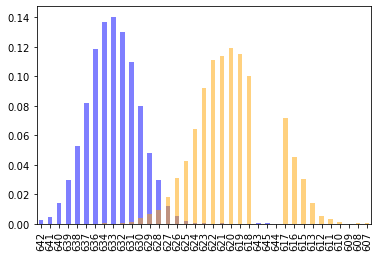

In [20]:
(cond_z_t[6]).plot.bar(color = "blue",alpha = 0.5)
(cond_z_t[14]).plot.bar(color = "orange",alpha = 0.5)
plt.show()

In [21]:
#列（時間）ごとにP(t)で割るとP(x|t)となる
cond_z_t = probs/p_t[0]
cond_z_t

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
642,0.000282,0.000283,0.000283,0.000849,0.001414,0.000565,0.002822,0.001978,0.000628,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282
641,0.000282,0.000283,0.000567,0.001982,0.002545,0.005929,0.004515,0.004521,0.001883,0.000848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
640,0.000282,0.001416,0.002267,0.005946,0.007919,0.012422,0.013826,0.013281,0.009102,0.002120,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000000,0.000283,0.000847,0.000847
639,0.003107,0.003681,0.003967,0.018403,0.016120,0.027668,0.029910,0.024866,0.013497,0.009754,...,0.000000,0.000000,0.000000,0.000000,0.000282,0.000282,0.000845,0.000565,0.002258,0.003670
638,0.008475,0.007078,0.011901,0.022650,0.039310,0.045172,0.052765,0.045493,0.036409,0.016964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001410,0.002815,0.001131,0.004516,0.003106
637,0.016102,0.020102,0.025786,0.043884,0.058824,0.078769,0.081828,0.072054,0.054928,0.032231,...,0.000000,0.000000,0.000000,0.000000,0.000564,0.001974,0.003941,0.006785,0.007903,0.012140
636,0.020056,0.034258,0.048739,0.071348,0.099830,0.113495,0.118792,0.100876,0.088512,0.060221,...,0.000000,0.000000,0.000000,0.000564,0.001411,0.005922,0.010135,0.012440,0.016088,0.016940
634,0.036158,0.058041,0.079059,0.100227,0.109446,0.130717,0.136851,0.130545,0.112994,0.092875,...,0.000281,0.000000,0.000000,0.001691,0.004798,0.010152,0.020270,0.019508,0.026813,0.034726
633,0.060169,0.071914,0.104562,0.116931,0.147907,0.145116,0.140519,0.143543,0.129002,0.111959,...,0.000000,0.000000,0.000847,0.004227,0.006492,0.020305,0.031813,0.029403,0.035563,0.050254
632,0.070621,0.105040,0.120147,0.127123,0.142534,0.134952,0.129797,0.144391,0.133710,0.150551,...,0.000281,0.000564,0.001693,0.005354,0.011572,0.030739,0.038570,0.037037,0.046571,0.058159


In [22]:
def bayes_estimation(sensor_value,current_estimation):
    new_estimation =[]
    for i in range(24):
        new_estimation.append(cond_z_t[i][sensor_value]*current_estimation[i])

    return new_estimation/sum(new_estimation)

0     0.043013
1     0.042916
2     0.042879
3     0.042916
4     0.042964
5     0.043037
6     0.043061
7     0.043001
8     0.038712
9     0.028651
10    0.028736
11    0.043098
12    0.043146
13    0.043025
14    0.043183
15    0.043122
16    0.043061
17    0.043122
18    0.043049
19    0.043086
20    0.043159
21    0.042976
22    0.043049
23    0.043037
Name: 0, dtype: float64


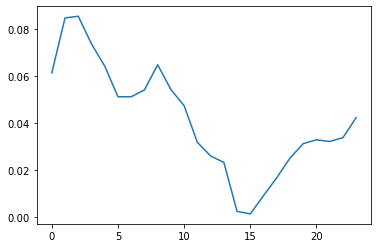

In [32]:
print(p_t[0])
estimation = bayes_estimation(630,p_t[0])
plt.plot(estimation)